# ConceptQuery Demo

In [1]:
from concept_query import GraphSearch
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import time

In [2]:
# Create graph search client
client = GraphSearch(neo4j_uri="bolt://34.74.158.108:7687", 
                     neo4j_user='neo4j', neo4j_password='password', neo4j_encrypted=True)

## Get networkx graph

In [7]:
start = time.time()
query = ['tensorflow', 'neural-network']
gr = client.get_result(*query)
print(f'Elapsed time: {time.time() - start} seconds')

Elapsed time: 2.8733034133911133 seconds


In [8]:
print(len(gr))

35


In [9]:
scores = []
for node, attr in gr.nodes(data=True):
    scores.append((node, attr['weight']))

In [10]:
sorted_nodes = sorted(scores, key=lambda x: x[1], reverse=True)
for node, weight in sorted_nodes:
    print(node, weight)

deep-learning 3.4629579924682434
python 3.31951543242455
software 3.0412907798951374
network 2.9934155076409046
neural-network 2.7887638567640063
model 2.49616071824994
google 2.4919515492899182
machine-learning 1.9880037982748064
keras 1.5494056988736706
application 1.5443466186775987
tensor 1.0199193647189617
tensorflow 1.0
community 0.9806820631377563
gpus 0.826991507838489
cnn 0.7779163160157005
utensor 0.6372551038659798
example 0.6325624197718696
algorithm 0.6136895555950934
dataset 0.547718929053534
question 0.4889524674212466
source 0.4829675058333786
training 0.4814840913988337
tensorboard 0.47294696151842075
regression 0.4505301414746942
image 0.4124524911183538
repository 0.3664898469195229
mcu 0.3587533021582784
user 0.34245731134189605
linux 0.3361235882660202
c++ 0.3336473698860188
inference 0.27179849275865664
lingvo 0.1894884933352946
graph 0.15194027065260426
deep 0.1490373329225617
space 0.09893230678578772


## Draw Graph

C:\Users\19196\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\19196\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


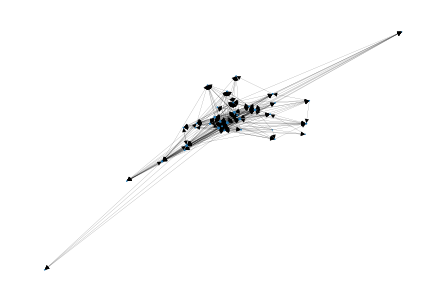

In [11]:
nx.draw_spring(gr, width=0.1, node_size=[gr.nodes[n]['weight'] for n in gr.nodes])

### Prune Graph

Repeatedly remove nodes that don't have outbound edges.

In [13]:
G = client.get_result(*query, prune=True)

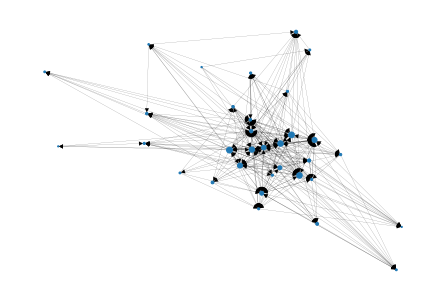

In [14]:
nx.draw_spring(G, width=0.1, node_size=[gr.nodes[n]['weight']*10 for n in G.nodes])

In [9]:
G.nodes

NodeView(('.net', 'core', 'flag', 'graph', 'histogram', 'repository', 'code', 'linux', 'version', 'instruction', 'python', 'c++', 'desktop', 'ecosystem', 'gaming', 'review', 'algorithm', 'regression', 'runtime', 'dataset', 'silicon', 'model', 'ngraph', 'software', 'cpu', 'source', 'backend', 'inference', 'gpu', 'image', 'tf', 'example', 'training', 'deep-learning', 'gpus', 'space', 'device', 'storage', 'machine-learning', 'form', 'application', 'trip', 'user', 'server', 'network', 'google', 'question', 'tpu', 'lingvo', 'community', 'tensorflow-processing-unit', 'tf.keras', 'keras', 'ml.net', 'deep', 'utensor', 'topic', 'neural-network', 'cnn', 'mcu', 'cloud', 'tensor', 'tensorboard', 'tensorflow'))

## Pickle Graphs

In [12]:
# Write
with open('tensorflow-networkx','wb') as f:
    pickle.dump(G, f)

In [13]:
# Read
with open('tensorflow-networkx','rb') as f:
    gr = pickle.load(f)

In [1]:
from concept_query.utils import distribute, ProxyRetriever, urlopen

import urllib
import time
from lxml.html import fromstring
import multiprocessing
from itertools import cycle
from lxml import etree

In [2]:
text = urlopen('https://www.bing.com/search?q=tensorflow')

In [3]:
parser = fromstring(text)

In [5]:
result = parser.xpath('//li[@class="b_algo"]')[0]
href = result.xpath('h2/a')[0].get('href')

In [6]:
href

'https://www.tensorflow.org/'

In [29]:
result.xpath('h2/a//text()')

['TensorFlow']

In [28]:
etree.tostring(result.xpath('div[@class="b_caption"]//p')[0])

b'<p><strong>TensorFlow</strong> is an end-to-end open source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries and community resources that lets researchers push the state-of-the-art in ML and developers easily build and deploy ML powered applications.</p>'

In [27]:
result.xpath('div[@class="b_caption"]//p//text()')

['TensorFlow',
 ' is an end-to-end open source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries and community resources that lets researchers push the state-of-the-art in ML and developers easily build and deploy ML powered applications.']

In [11]:
try:
    raise Exception("hello")
except Exception as e:
    print(str(e))
    print(str(e) == "hello")

hello
True


In [12]:
raise Exception("hello")

Exception: hello

In [ ]:
1205 (HY000): Lock wait timeout exceeded; try restarting transaction